In [2]:
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.datasets.samples_generator import make_blobs
#import matplotlib.pyplot as plt 
#import numpy as np
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
#%matplotlib inline
%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from sklearn.model_selection import train_test_split
#from sklearn.decomposition import PCA
#from matplotlib import cm
import pandas.plotting 
#from pandas.plotting import scatter_matrix
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from numpy import sqrt
from matplotlib.pyplot import subplots
import seaborn as sns
#import googletrans
#from googletrans import Translator
import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns; sns.set()
#from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#import plotly.py as py

In [35]:
SuicideData = pd.read_csv('/home/dcpell/master.csv')

In [36]:
SuicideData = SuicideData.loc[SuicideData['country'].isin(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Finland', 'Netherlands', 'Sweden', 'Australia', 'Israel', 'Austria', 'Mexico', 'United States', 'Brazil', 'Luxembourg', 'Belgium', 'United Kingdom', 'Singapore', 'Panama', 'Germany', 'Chile', 'Qatar', 'Argentina', 'Czech Republic', 'Uruguay', 'Colombia', 'Thailand', 'Spain', 'Malta', 'Guatemala', 'Japan', 'Ecuador', 'Italy', 'Kazakhstan', 'Slovenia', 'Lithuania', 'Nicaragua', 'Poland', 'Croatia', 'Russian Federation', 'Cyprus', 'Turkmenistan', 'Muaritius', 'Estonia', 'Turkey', 'Kyrgyzstan', 'Romania', 'Serbia', 'Latvia', 'Greece', 'Hungary', 'Ukraine', 'South Africa', 'Armenia', 'Georgia'])]
SuicideData.head(1)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation


In [6]:
SuicideData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16750 entries, 588 to 27555
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             16750 non-null  object 
 1   year                16750 non-null  int64  
 2   sex                 16750 non-null  object 
 3   age                 16750 non-null  object 
 4   suicides_no         16750 non-null  int64  
 5   population          16750 non-null  int64  
 6   suicides/100k pop   16750 non-null  float64
 7   country-year        16750 non-null  object 
 8   HDI for year        5448 non-null   float64
 9    gdp_for_year ($)   16750 non-null  object 
 10  gdp_per_capita ($)  16750 non-null  int64  
 11  generation          16750 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.7+ MB


In [7]:
SuicideData.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          11302
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [37]:
SuicideData.dropna(axis=0, how='any')

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
588,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
589,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
590,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,0.694,"88,416,668,900",3264,Silent
591,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,0.694,"88,416,668,900",3264,G.I. Generation
592,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,0.694,"88,416,668,900",3264,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27539,Uruguay,2014,female,25-34 years,20,231636,8.63,Uruguay2014,0.793,"57,236,013,086",18012,Millenials
27540,Uruguay,2014,female,15-24 years,18,255685,7.04,Uruguay2014,0.793,"57,236,013,086",18012,Millenials
27541,Uruguay,2014,female,75+ years,11,158956,6.92,Uruguay2014,0.793,"57,236,013,086",18012,Silent
27542,Uruguay,2014,male,5-14 years,1,253946,0.39,Uruguay2014,0.793,"57,236,013,086",18012,Generation Z


In [38]:
SuicideData.drop(["country-year", "HDI for year"], axis = 1, inplace = True)

In [10]:
SuicideData.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [11]:
SuicideData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16750 entries, 588 to 27555
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             16750 non-null  object 
 1   year                16750 non-null  int64  
 2   sex                 16750 non-null  object 
 3   age                 16750 non-null  object 
 4   suicides_no         16750 non-null  int64  
 5   population          16750 non-null  int64  
 6   suicides/100k pop   16750 non-null  float64
 7    gdp_for_year ($)   16750 non-null  object 
 8   gdp_per_capita ($)  16750 non-null  int64  
 9   generation          16750 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.4+ MB


In [39]:
SuicideData.rename(columns={'suicides/100k pop':'SuicidesRate', ' gdp_for_year ($) ':'GDP In Year',
                          'gdp_per_capita ($)':'GDP', 'country' : 'Country'}, inplace=True)
SuicideData.head(1)

,Country,year,sex,age,suicides_no,population,SuicidesRate,GDP In Year,GDP,generation
588,Argentina,1985,male,75+ years,202,363000,55.65,"88,416,668,900",3264,G.I. Generation


In Suicide Data Russia is called Russian Federation vs in Happiness Dataset it is called Russia, so changing the name Russian Federation to Russia. 

In [40]:
SuicideData['Country']= SuicideData['Country'].map(lambda x: 'Russia' if x == 'Russian Federation' else x)

World Happiness Report is for 2015, therefore subsetting for the year 2015 in Suicide Data for descriptive analysis. 

Descriptive Statistics 

In [41]:
SuicideData = SuicideData.loc[SuicideData['year'].isin(['2015'])]
SuicideData.tail(2)

,Country,year,sex,age,suicides_no,population,SuicidesRate,GDP In Year,GDP,generation
27554,Uruguay,2015,male,5-14 years,3,252509,1.19,"53,274,304,222",16696,Generation Z
27555,Uruguay,2015,female,5-14 years,2,241598,0.83,"53,274,304,222",16696,Generation Z


In [15]:
print('Top Three Countries with Highest Suicide Rates 2015')
SuicidesHigh = SuicideData['SuicidesRate'].groupby(SuicideData.Country).sum().sort_values(ascending=False)
SuicidesHigh.head(3)

Top Three Countries with Highest Suicide Rates 2015


Country
Lithuania    385.48
Uruguay      270.02
Slovenia     264.81
Name: SuicidesRate, dtype: float64

Since in Suicide Data, it has the suicide rates for each age group, therefore, for this, it will be the sum of all suicide rates for male and female for all age groups. Likewise, only the top 3 suicide rates countries for the year 2015 are of interest. Therefore sort values is set at true for ascending. 

Text(0.5, 1.0, 'Figure 1. Countries with Highest Suicide Rates(Combined male and female of all ages)')

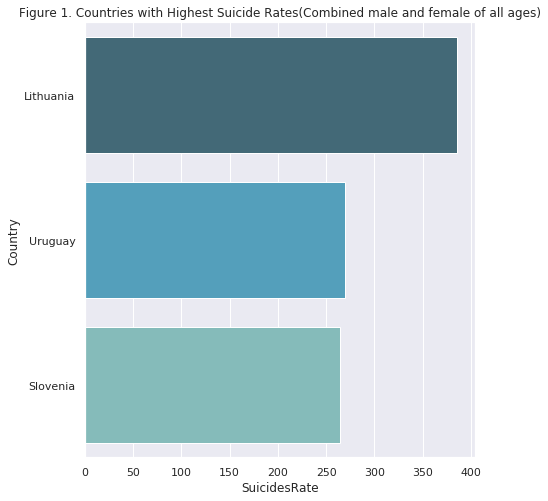

In [18]:
SuicidesHigh = SuicideData['SuicidesRate'].groupby(SuicideData.Country).sum().sort_values(ascending=False)
plt.figure(figsize=(7,8))
sns.barplot(SuicidesHigh.head(3),SuicidesHigh.head(3).index,palette='GnBu_d')
plt.title("Figure 1. Countries with Highest Suicide Rates(Combined male and female of all ages)")

In [19]:
print("Top Three Countries with Lowest Suicide Rates 2015")
SuicidesLow = SuicideData['SuicidesRate'].groupby(SuicideData.Country).sum().sort_values(ascending=True)
SuicidesLow.head(3)

Top Three Countries with Lowest Suicide Rates 2015


Country
South Africa    13.00
Qatar           18.84
Turkey          28.47
Name: SuicidesRate, dtype: float64

The same holds true for here except ascending is set to false, to get the 3 lowest suicide rate countries. 

Text(0.5, 1.0, 'Fig 2. Countries With Lowest Suicide Rates(combined male and female of all ages) 2015')

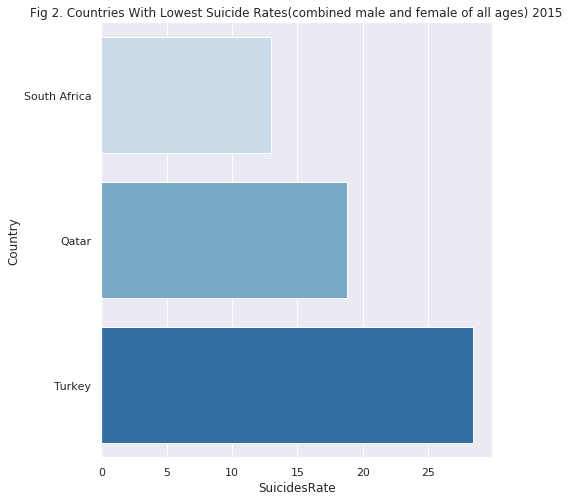

In [20]:
SuicidesLow = SuicideData['SuicidesRate'].groupby(SuicideData.Country).sum().sort_values(ascending=True)
plt.figure(figsize=(7,8))
sns.barplot(SuicidesLow.head(3),SuicidesLow.head(3).index,palette='Blues')
plt.title("Fig 2. Countries With Lowest Suicide Rates(combined male and female of all ages) 2015")

In [44]:
Happiness = pd.read_csv('2015.csv')
Happiness.head(100)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.06913,0.83223,0.91916,0.79081,0.09245,0.00227,0.24808,2.06367
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
97,Dominican Republic,Latin America and Caribbean,98,4.885,0.07446,0.89537,1.17202,0.66825,0.57672,0.14234,0.21684,1.21305
98,Laos,Southeastern Asia,99,4.876,0.06698,0.59066,0.73803,0.54909,0.59591,0.24249,0.42192,1.73799


In [217]:
Happiness.shape

(158, 12)

In [138]:
SuicideData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 576 to 27555
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         744 non-null    object 
 1   year            744 non-null    int64  
 2   sex             744 non-null    object 
 3   suicides_no     744 non-null    int64  
 4   population      744 non-null    int64  
 5   SuicidesRate    744 non-null    float64
 6   GDP In Year     744 non-null    object 
 7   GDP Per Capita  744 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 52.3+ KB


In [139]:
SuicideData.isnull().sum()

Country           0
year              0
sex               0
suicides_no       0
population        0
SuicidesRate      0
GDP In Year       0
GDP Per Capita    0
dtype: int64

In [144]:
#HappinessSuicide.drop(["GDP", "suicides_no", "generation", "sex", "GDP In Year", 'Standard Error', 'year', 'age', 'population'], axis = 1, inplace = True)

In [58]:
#HappinessSuicide.drop(["year","age"], axis=1, inplace=True)
#HappinessSuicide.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,population,SuicidesRate
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,275569.0,51.89


In [59]:
#HappinessSuicide.drop(['population'], axis=1, inplace=True)
#HappinessSuicide.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,SuicidesRate
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,51.89


In [140]:
#gender = {'male': 1,'female': 0}

#SuicideData.sex = [gender[item] for item in SuicideData.sex]
#print(SuicideData)

                   Country  year  sex  suicides_no  population  SuicidesRate  \
576    Antigua and Barbuda  2015    0            1        6403         15.62   
577    Antigua and Barbuda  2015    0            0        8561          0.00   
578    Antigua and Barbuda  2015    0            0        7740          0.00   
579    Antigua and Barbuda  2015    0            0       15323          0.00   
580    Antigua and Barbuda  2015    0            0        8239          0.00   
...                    ...   ...  ...          ...         ...           ...   
27551              Uruguay  2015    0           23      232133          9.91   
27552              Uruguay  2015    0           38      440475          8.63   
27553              Uruguay  2015    0           17      255067          6.66   
27554              Uruguay  2015    1            3      252509          1.19   
27555              Uruguay  2015    0            2      241598          0.83   

          GDP In Year  GDP Per Capita  

/home/dcpell/.local/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#HappinessSuicide.describe().transpose()

In [206]:
#SuicideData = pd.read_csv('/home/dcpell/master.csv')

In [42]:
Happiness = pd.read_csv('/home/dcpell/2015.csv')
Happiness.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [43]:
HappinessSuicide = pd.merge(Happiness, SuicideData, left_on = 'Country', right_on='Country', how = 'outer')
HappinessSuicide = HappinessSuicide.dropna()
HappinessSuicide.head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Dystopia Residual,year,sex,age,suicides_no,population,SuicidesRate,GDP In Year,GDP,generation
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,male,75+ years,143.0,275569.0,51.89,"679,289,166,858",86068.0,Silent
1,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,male,55-74 years,264.0,891482.0,29.61,"679,289,166,858",86068.0,Boomers
2,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,male,35-54 years,242.0,1248988.0,19.38,"679,289,166,858",86068.0,Generation X
3,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,male,25-34 years,80.0,586880.0,13.63,"679,289,166,858",86068.0,Millenials
4,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,male,15-24 years,62.0,482708.0,12.84,"679,289,166,858",86068.0,Millenials
5,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,female,75+ years,41.0,414205.0,9.90,"679,289,166,858",86068.0,Silent
6,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,female,35-54 years,111.0,1227126.0,9.05,"679,289,166,858",86068.0,Generation X
7,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,female,55-74 years,82.0,922222.0,8.89,"679,289,166,858",86068.0,Boomers
8,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,female,15-24 years,20.0,462559.0,4.32,"679,289,166,858",86068.0,Millenials
9,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,2.51738,2015.0,female,25-34 years,24.0,577973.0,4.15,"679,289,166,858",86068.0,Millenials


In [25]:
import plotly.graph_objs as go

Source for this choropleth 
https://stackoverflow.com/questions/52990452/plotly-world-choropleth-map-offline-in-python

In [44]:
data = dict(type = 'choropleth', 
           locations = HappinessSuicide['Country'],
           locationmode = 'country names',
           z = HappinessSuicide['Happiness Rank'], 
           text = HappinessSuicide['Country'],
           colorbar = {'title':'Happiness Rank'},
           colorscale = "oranges")
layout = dict(title = 'Map 1. Global Happiness 2015', 
             geo = dict(showframe = False, 
                       projection = {'type': 'conic equidistant'}))
choromap = go.Figure(data = [data], layout=layout)
choromap

In [28]:
HappinessSuicide.drop(["GDP", "suicides_no", "generation", "sex", "GDP In Year", 'Standard Error', 'year', 'age', 'population'], axis = 1, inplace = True)

In [29]:
HappinessSuicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 712
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        636 non-null    object 
 1   Region                         636 non-null    object 
 2   Happiness Rank                 636 non-null    int64  
 3   Happiness Score                636 non-null    float64
 4   Economy (GDP per Capita)       636 non-null    float64
 5   Family                         636 non-null    float64
 6   Health (Life Expectancy)       636 non-null    float64
 7   Freedom                        636 non-null    float64
 8   Trust (Government Corruption)  636 non-null    float64
 9   Generosity                     636 non-null    float64
 10  Dystopia Residual              636 non-null    float64
 11  SuicidesRate                   636 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 6

In [144]:
#HappinessSuicide.to_csv("HappinessSuicide.csv")

In [35]:
#HappinessSuicide = pd.read_csv("HappinessSuicide.csv")

In [30]:
HappinessSuicide.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
SuicidesRate                     0
dtype: int64

In [31]:
HappinessSuicide.drop(['Country', 'Region'], axis = 1, inplace = True)

In [32]:
HappinessSuicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 712
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 636 non-null    int64  
 1   Happiness Score                636 non-null    float64
 2   Economy (GDP per Capita)       636 non-null    float64
 3   Family                         636 non-null    float64
 4   Health (Life Expectancy)       636 non-null    float64
 5   Freedom                        636 non-null    float64
 6   Trust (Government Corruption)  636 non-null    float64
 7   Generosity                     636 non-null    float64
 8   Dystopia Residual              636 non-null    float64
 9   SuicidesRate                   636 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 54.7 KB


In [33]:
HappinessSuicide.isnull().sum()

Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
SuicidesRate                     0
dtype: int64

In [63]:
HappinessSuicide.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 712
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 636 non-null    int64  
 1   Happiness Score                636 non-null    float64
 2   Economy (GDP per Capita)       636 non-null    float64
 3   Family                         636 non-null    float64
 4   Health (Life Expectancy)       636 non-null    float64
 5   Freedom                        636 non-null    float64
 6   Trust (Government Corruption)  636 non-null    float64
 7   Generosity                     636 non-null    float64
 8   Dystopia Residual              636 non-null    float64
 9   SuicidesRate                   636 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 54.7 KB


In [22]:
#HappinessSuicide.drop(["Happiness Rank"], axis = 1, inplace = True)

In [151]:
#HappinessSuicide.drop(['population'], axis=1, inplace=True)

In [ ]:
#HappinessSuicide = HappinessSuicide.drop()

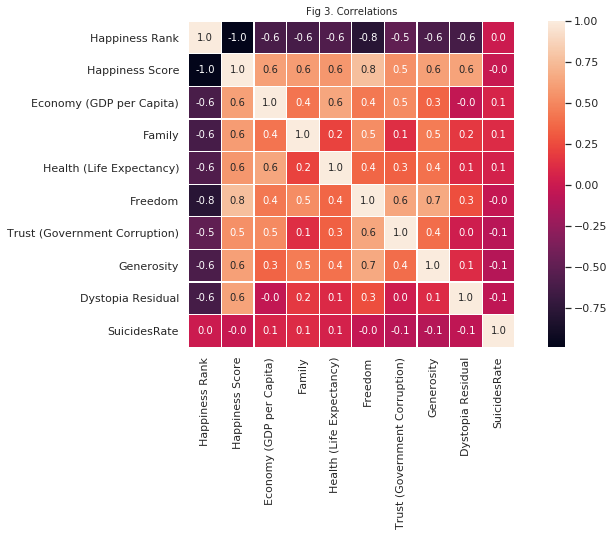

In [31]:
plt.subplots(figsize=(12,6))
ax = sns.heatmap(HappinessSuicide.corr(), annot=True, linewidths = 0.3, fmt = '.1f', square=True)
plt.title('Fig 3. Correlations', size=10)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Artificial Neural Network (ANN)

Source for this really cool code below that made this ANN possible!
https://www.kaggle.com/elcaiseri/classification-of-high-low-suicide-rates

Low Suicide Rates=0 and high suicide rates=1

In [156]:
## Classification 
HappinessSuicide['SuicidesRate'] = np.where(HappinessSuicide['SuicidesRate']>HappinessSuicide['SuicidesRate'].mean(), 
                                 1, 0)

In [119]:
X = np.array(HappinessSuicide.drop(['SuicidesRate', 'SuicidesRate'], 1))
y = np.array(HappinessSuicide.SuicidesRate)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [122]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [123]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [124]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8
count,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02,4.770000e+02
mean,-4.236071e-17,2.789290e-15,3.165649e-15,-3.576454e-15,8.656714e-15,7.180839e-15,1.513115e-15,1.989091e-15,2.948026e-15
std,1.001050e+00,1.001050e+00,1.001050e+00,1.001050e+00,1.001050e+00,1.001050e+00,1.001050e+00,1.001050e+00,1.001050e+00
min,-1.301937e+00,-2.128364e+00,-2.907467e+00,-4.143267e+00,-4.234081e+00,-2.722716e+00,-1.113714e+00,-1.681629e+00,-2.071855e+00
25%,-8.651499e-01,-5.951706e-01,-4.982698e-01,-3.508294e-01,-6.169433e-01,-7.460680e-01,-8.656082e-01,-8.095870e-01,-7.826711e-01
50%,-2.827670e-01,1.097461e-01,6.047735e-02,3.557927e-01,1.830637e-02,1.362618e-01,-2.128606e-01,-6.107129e-02,4.543102e-02
75%,6.199264e-01,8.300828e-01,7.444784e-01,6.633006e-01,6.643715e-01,8.694904e-01,4.106408e-01,7.283043e-01,5.894660e-01
max,2.454432e+00,1.495348e+00,2.456135e+00,1.286916e+00,1.717369e+00,1.320204e+00,2.476538e+00,2.515798e+00,2.767245e+00


In [126]:
from sklearn.neural_network import MLPClassifier

In [127]:
mlp = MLPClassifier(hidden_layer_sizes=(9,9,9),max_iter=500)

In [128]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(9, 9, 9), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [129]:
len(mlp.coefs_) 

4

In [130]:
len(mlp.coefs_[0]) 

9

In [131]:
len(mlp.intercepts_[0])

9

In [132]:
predictions = mlp.predict(X_test)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix

In [134]:
print("Fig 4. Classification Report")
print(classification_report(y_test,predictions))

Fig 4. Classification Report
              precision    recall  f1-score   support

           0       0.67      0.93      0.78       103
           1       0.53      0.14      0.23        56

    accuracy                           0.65       159
   macro avg       0.60      0.54      0.50       159
weighted avg       0.62      0.65      0.58       159

